# Dataset : Online Retail
Transnational data set is used in this project, which contains all the transaction occured between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
### It has total 8 features:
#### 1.InvoiceNo:
Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
#### 2.StockCode:
Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
#### 3.Description:
Product (item) name. Nominal. Quantity: The quantities of each product (item) per transaction. Numeric.
#### 4.InvoiceDate:
Invoice Date and time. Numeric, the day and time when each transaction was generated.
#### 5.UnitPrice:
Unit price. Numeric, Product price per unit in sterling.
#### 6.CustomerID:
Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
#### 7.Country:
Country name. Nominal, the name of the country where each customer resides.
#### 8.Quantity

# Data Collection and Preparation

In [42]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
#Importing Online retail data 
rtl_data = pd.read_csv('Online Retail.csv')
rtl_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [44]:
rtl_data.drop(columns = ['InvoiceNo'], axis='columns', inplace=True)

In [45]:
rtl_data

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [30]:
pip install ydata-profiling

In [39]:
import ydata_profiling as yp
from ydata_profiling import ProfileReport

profile = ProfileReport(rtl_data)
profile.to_file(output_file = 'output.html')

C:\Users\Administrator\anaconda3\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
#checking the shape of dataset
print(rtl_data.shape)
#checking the data types of dataset
rtl_data.dtypes

(541909, 7)


StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

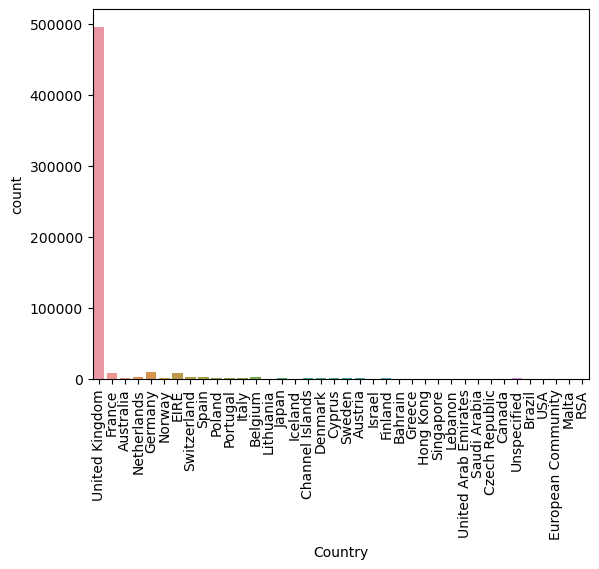

In [47]:
sns.countplot(data = rtl_data, x = 'Country')
plt.xticks(rotation=90)
plt.show()

### As we can see 90% of customer are from UK only so,we will keep the data of UK only

In [48]:
rtl_data = rtl_data[rtl_data['Country']=='United Kingdom']
rtl_data.sample(5)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
82284,20725,LUNCH BAG RED RETROSPOT,10,2/4/2011 12:29,1.65,13309.0,United Kingdom
263505,22998,TRAVEL CARD WALLET KEEP CALM,120,7/14/2011 12:42,0.42,14716.0,United Kingdom
311354,21495,SKULLS AND CROSSBONES WRAP,25,8/24/2011 10:45,0.42,14796.0,United Kingdom
294031,21975,PACK OF 60 DINOSAUR CAKE CASES,2,8/8/2011 13:46,0.55,17954.0,United Kingdom
52465,22445,PENCIL CASE LIFE IS BEAUTIFUL,2,1/11/2011 12:11,2.95,17365.0,United Kingdom


### checking for missing values in the dataset

In [49]:
rtl_data.isnull().sum()

StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

### Removing the missing values

In [52]:
rtl_data.dropna(subset=['CustomerID','Description'], inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13840\2794051938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtl_data.dropna(subset=['CustomerID','Description'], inplace=True)


In [53]:
rtl_data.isnull().sum(axis=0)

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Checking the minimum value of quantity

In [54]:
rtl_data.Quantity.min()

-80995

In [55]:
rtl_data = rtl_data[rtl_data['Quantity']>0]

In [56]:
rtl_data.Quantity.min()

1

### Checking the minimum value of unit price

In [57]:
rtl_data.UnitPrice.min()

0.0

### convert the string date field to datetime

In [58]:
rtl_data['InvoiceDate'] = pd.to_datetime(rtl_data['InvoiceDate'])
rtl_data.dtypes

StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### Add a new column depicting total amount for knowing the values of monetory factor in rfm analysis later on

In [59]:
rtl_data['total_amount'] = rtl_data['Quantity'] * rtl_data['UnitPrice']
rtl_data

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541889,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
541890,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60
541891,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00
541892,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80


# ---------------------------Key Revenue-generating Products-------------------------------

### Revenue generated by each top revenue generating product.

In [79]:
rtl_data['Date'] = rtl_data['InvoiceDate'].dt.date
sold_most = rtl_data.groupby(['StockCode', 'Description','Date']).agg({'Quantity': 'sum', 'total_amount': 'sum'}).sort_values(by='total_amount', ascending=False).reset_index()
sold_most.rename(columns = {'total_amount': 'Revenue'}, inplace = True)
sold_most

,StockCode,Description,Date,Quantity,Revenue
0,23843,"PAPER CRAFT , LITTLE BIRDIE",2011-12-09,80995,168469.60
1,23166,MEDIUM CERAMIC TOP STORAGE JAR,2011-01-18,74215,77183.60
2,22502,PICNIC BASKET WICKER 60 PIECES,2011-06-10,61,39619.50
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-01-11,3114,8656.00
4,POST,POSTAGE,2011-05-03,1,8142.75
...,...,...,...,...,...
205280,22167,OVAL WALL MIRROR DIAMANTE,2011-07-26,1,0.00
205281,22090,PAPER BUNTING RETROSPOT,2011-01-06,24,0.00
205282,84826,ASSTD DESIGN 3D PAPER STICKERS,2011-11-25,12540,0.00
205283,22089,PAPER BUNTING VINTAGE PAISLEY,2011-11-10,24,0.00


([<matplotlib.patches.Wedge at 0x2158b792990>,
 [Text(-0.1983556452001484, 1.0819681317013146, 'PAPER CRAFT , LITTLE BIRDIE'),
  Text(-0.43386941290771125, -1.0108201286792413, 'MEDIUM CERAMIC TOP STORAGE JAR'),
  Text(0.7962056379331212, -0.7589839142719111, 'PICNIC BASKET WICKER 60 PIECES'),
  Text(1.0631996632162917, -0.28214619638897154, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1.0960579149726524, -0.09304325352115642, 'POSTAGE')],
 [Text(-0.10819398829099001, 0.5901644354734442, '55.8%'),
  Text(-0.2366560434042061, -0.5513564338250406, '25.6%'),
  Text(0.43429398432715693, -0.41399122596649696, '13.1%'),
  Text(0.5799270890270681, -0.15389792530307536, '2.9%'),
  Text(0.5978497718032648, -0.0507508655569944, '2.7%')])

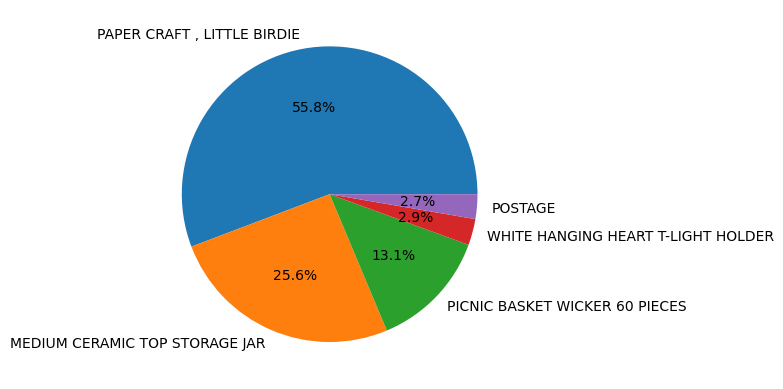

In [80]:
top_products = sold_most.head(5)
plt.pie(top_products['Revenue'], labels=top_products['Description'], autopct='%1.1f%%')

### Visualisation

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

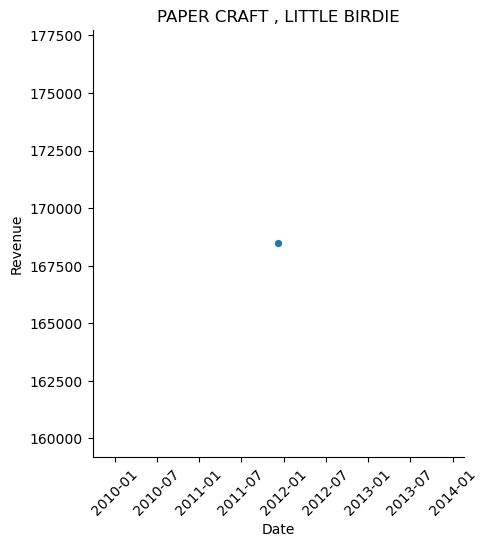

<Figure size 500x500 with 0 Axes>

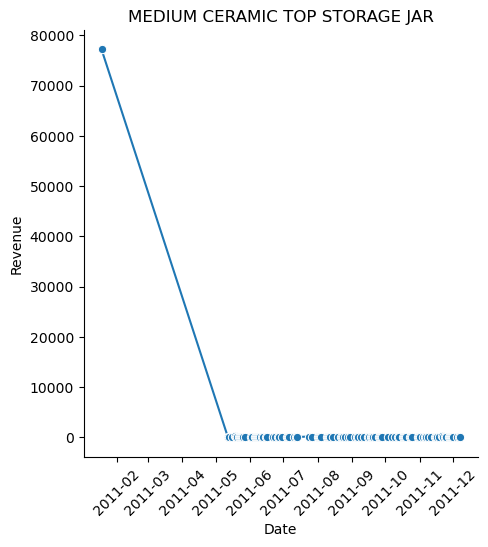

<Figure size 500x500 with 0 Axes>

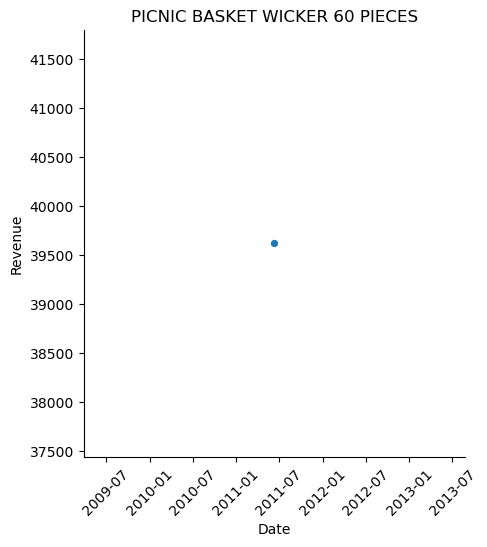

<Figure size 500x500 with 0 Axes>

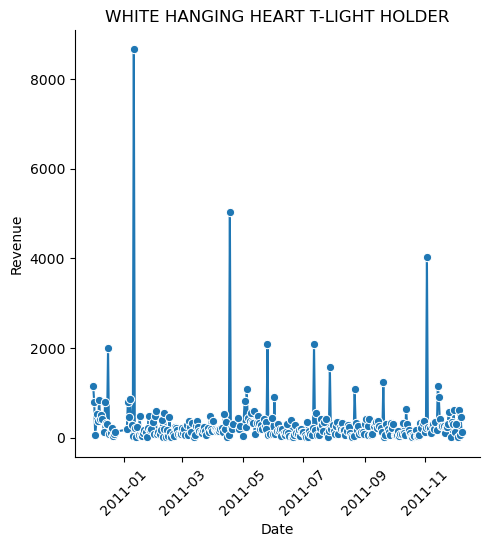

<Figure size 500x500 with 0 Axes>

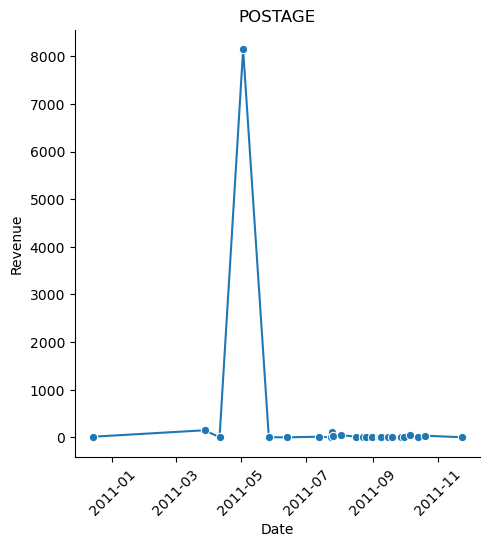

In [81]:
top_products = sold_most.head(5)['Description']

for product_name in top_products:
    product_data = sold_most[sold_most['Description'] == product_name]
    plt.figure(figsize=(5, 5))
    
    sns.relplot(data=product_data, x='Date', kind = 'line',y='Revenue', marker='o', linestyle='-')
    plt.title(product_name)
    plt.xticks(rotation=45)

# ----Customer Purchase Patterns: Day of Week and Time of Day Analysis----

In [82]:
rtl_data['Day'] = rtl_data['InvoiceDate'].dt.day_name()
rtl_data['Hour'] = rtl_data['InvoiceDate'].dt.hour
rtl_data

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,Date,Day,Hour
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,Wednesday,8
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,8
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,Wednesday,8
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,8
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...
541889,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,2011-12-09,Friday,12
541890,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,2011-12-09,Friday,12
541891,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,2011-12-09,Friday,12
541892,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,2011-12-09,Friday,12


In [99]:
filtered = rtl_data.groupby(['Date','CustomerID','Hour'])['total_amount'].sum().reset_index()
filtered['Date'] = pd.to_datetime(filtered['Date'])
filtered['Day'] = filtered['Date'].dt.day_name()
filtered.rename(columns = {'total_amount': 'Revenue'}, inplace = True)
filtered

,Date,CustomerID,Hour,Revenue,Day
0,2010-12-01,12748.0,12,4.95,Wednesday
1,2010-12-01,12838.0,11,390.79,Wednesday
2,2010-12-01,12868.0,12,203.30,Wednesday
3,2010-12-01,12921.0,15,322.40,Wednesday
4,2010-12-01,12947.0,16,304.04,Wednesday
...,...,...,...,...,...
15367,2011-12-09,17428.0,9,415.60,Friday
15368,2011-12-09,17490.0,9,730.70,Friday
15369,2011-12-09,17581.0,12,984.68,Friday
15370,2011-12-09,17754.0,11,200.99,Friday


In [95]:
daily_transactions = filtered['Day'].value_counts().reset_index()
hourly_transactions = filtered['Hour'].value_counts().reset_index()
daily_transactions.sort_values(by = 'count')

,Day,count
5,Sunday,1920
4,Friday,2255
3,Monday,2357
2,Tuesday,2693
1,Wednesday,2832
0,Thursday,3315


In [96]:
hourly_transactions.sort_values(by = 'count')

,Hour,count
14,6,1
13,20,17
12,7,22
11,19,126
10,18,144
9,8,408
8,17,465
7,16,937
6,9,1087
5,15,1721


Text(0.5, 1.0, 'Customer Purchasing Pattern on different days')

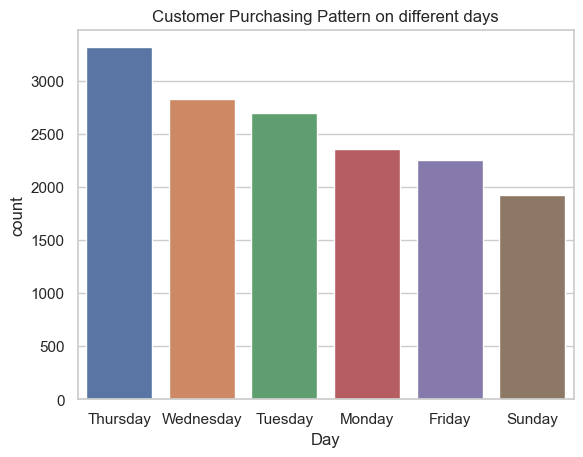

In [86]:
sns.barplot(data = daily_transactions,x = 'Day',y = 'count')
plt.title('Customer Purchasing Pattern on different days')

Text(0.5, 1.0, 'Customer Purchasing Pattern on Hours of a day')

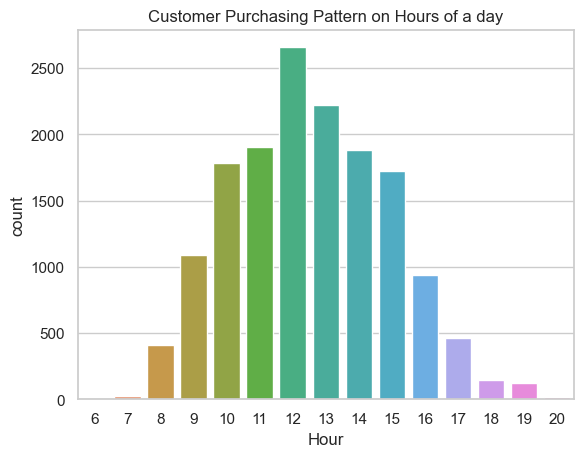

In [87]:
sns.barplot(data = hourly_transactions,x = 'Hour',y = 'count')
plt.title('Customer Purchasing Pattern on Hours of a day')

## Day Wise Revenue Distribution

In [88]:
day_revenue = filtered.groupby('Day')['Revenue'].sum().reset_index().sort_values(by = 'Revenue')
day_revenue

,Day,Revenue
2,Sunday,694851.331
1,Monday,1129371.011
0,Friday,1218089.001
5,Wednesday,1280843.370
4,Tuesday,1418573.601
3,Thursday,1566663.240


Text(0.5, 1.0, 'Day Wise Revenue Distribution')

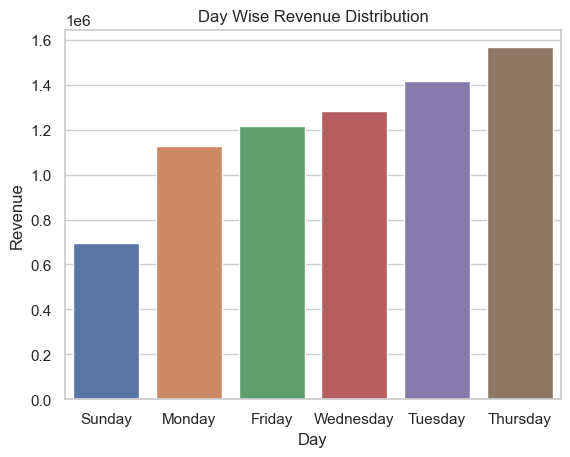

In [89]:
sns.barplot(data = day_revenue,x = 'Day',y = 'Revenue')
plt.title('Day Wise Revenue Distribution')

# RFM Modeling

Recency = Latest Date - Last Invoice Date        
Frequency = count the counts of a Customer Id         
Monetary = sum of total amount for each customer

In [101]:
import datetime as dt
rtl_data = rtl_data.groupby(['CustomerID','Date'])['total_amount'].sum().reset_index()
rtl_data['Date'] = pd.to_datetime(rtl_data['Date'])
rtl_data

,CustomerID,Date,total_amount
0,12346.0,2011-01-18,77183.60
1,12747.0,2010-12-05,358.56
2,12747.0,2010-12-13,347.71
3,12747.0,2011-01-20,303.04
4,12747.0,2011-03-01,310.78
...,...,...,...
15090,18283.0,2011-11-30,223.61
15091,18283.0,2011-12-06,208.00
15092,18287.0,2011-05-22,765.28
15093,18287.0,2011-10-12,1001.32


### Calculating RFM scores for each customer

In [103]:
#set Latest date 2011-12-10 as Last invoice date was 2011-12-09. This is to calculate the number of dates from recent purchase
Latest_Date = dt.datetime(2011,12,10)

# Calculate RFM scores for each customer
RFMScores = rtl_data.groupby('CustomerID').agg({
    'Date': lambda x: (Latest_Date - x.max()).days,  # Recency
    'CustomerID': 'size',  # Frequency (using CustomerID directly)
    'total_amount': 'sum'  # Monetary
})

#Convert Invoice Date into type int
RFMScores['Date'] = RFMScores['Date'].astype(int)

#Rename column names to recency, frequency and monetary
RFMScores.rename(columns = {'Date': 'Recency',
                            'CustomerID': 'Frequency',
                            'total_amount': 'Monetary'}, inplace = True)

RFMScores.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,3,11,4196.01
2,12748.0,1,114,33719.73
3,12749.0,4,4,4090.88
4,12820.0,4,4,942.34
...,...,...,...,...
3916,18280.0,278,1,180.60
3917,18281.0,181,1,80.82
3918,18282.0,8,2,178.05
3919,18283.0,4,14,2094.88


In [104]:
RFMScores.dtypes

Recency        int32
Frequency      int64
Monetary     float64
dtype: object

## Descriptive statistics of Recency ,frequency and monetary

In [105]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    3921.000000
mean       92.722265
std        99.528532
min         1.000000
25%        18.000000
50%        51.000000
75%       143.000000
max       374.000000
Name: Recency, dtype: float64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13840\60436057.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: xlabel='Recency', ylabel='Density'>

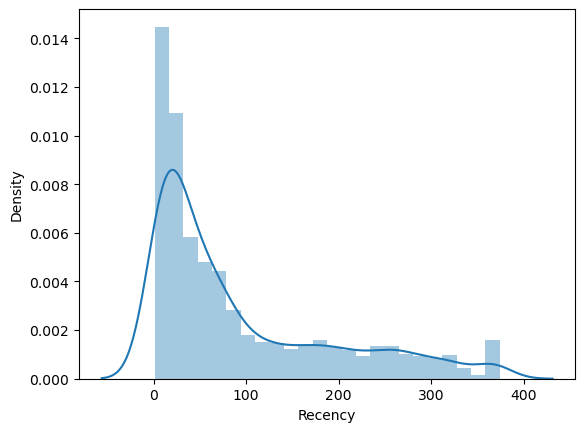

In [106]:
#Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']
sns.distplot(x)

Lesser the Recency better it will be, and we can see that lower recency has higher density

In [107]:
#Descriptive statstistics (Frequency)
RFMScores.Frequency.describe()

count    3921.000000
mean        3.849783
std         5.717734
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       114.000000
Name: Frequency, dtype: float64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13840\2694504307.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: xlabel='Frequency', ylabel='Density'>

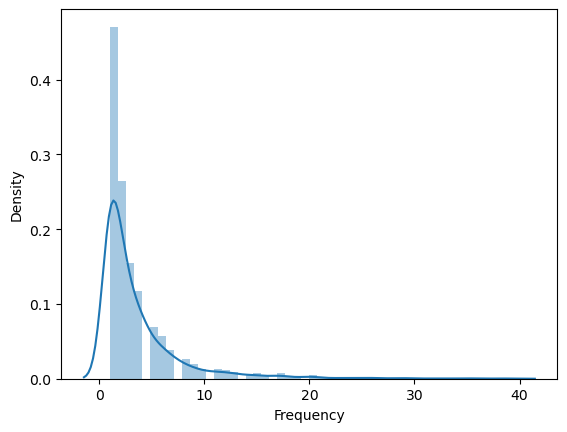

In [108]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = RFMScores.query('Frequency < 40')['Frequency']
sns.distplot(x)

In [109]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13840\1740829616.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: xlabel='Monetary', ylabel='Density'>

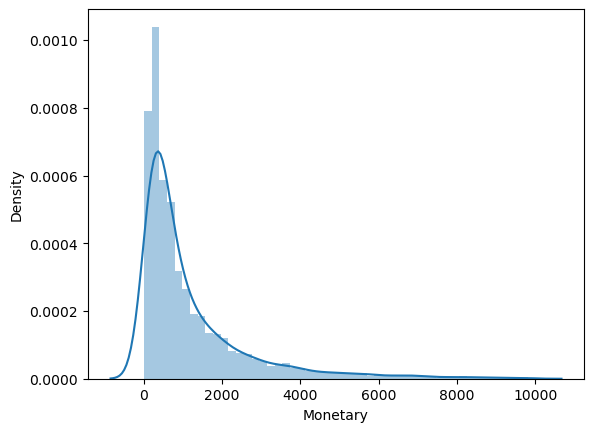

In [110]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = RFMScores.query('Monetary < 10000')['Monetary']
sns.distplot(x)

In [112]:
quantiles = RFMScores.quantile(q = [0.25,0.5,0.75]) 
# Quantiles divide the data into equal portions. 
# [0.25, 0.5, 0.75] indicates that the code is computing the 25th, 50th (median), and 75th percentiles of the RFM scores.

print(quantiles)

quantiles = quantiles.to_dict() #this just convert it into dictionary
quantiles

      Recency  Frequency  Monetary
0.25     18.0        1.0    300.04
0.50     51.0        2.0    651.82
0.75    143.0        4.0   1575.89


{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0},
 'Monetary': {0.25: 300.04, 0.5: 651.8199999999999, 0.75: 1575.89}}

### Functions to create R,F and M segments

In [113]:
# d is dictionary here which is quantitle, x is the value of feature and p is the name of feature
def RScoring(x,p,d):
    if x<=d[p][0.25]:
        return 1 #as the lower recency is better 
    elif x<= d[p][0.50]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x<= d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1
        

In [114]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,4,4,1
12747.0,3,11,4196.01,1,1,1
12748.0,1,114,33719.73,1,1,1
12749.0,4,4,4090.88,1,2,1
12820.0,4,4,942.34,1,2,2


### Calculate RFMScore and RFMGroup value and add the column showing combined concatenated score of RFM

In [116]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)
#.map(str): This is a method used in pandas DataFrame to apply a function to each element of a column.
#In this case, str is a built-in Python function that converts its argument to a string.
#After applying .map(str) to each of the 'R', 'F', and 'M' columns, the code then concatenates these string representations together using the + operator.

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,326,1,77183.60,4,4,1,441,9
12747.0,3,11,4196.01,1,1,1,111,3
12748.0,1,114,33719.73,1,1,1,111,3
12749.0,4,4,4090.88,1,2,1,121,4
12820.0,4,4,942.34,1,2,2,122,5


### Assign Loyalty Level to each customer

In [117]:
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
#pd.qcut():- It divides the data into quantile-based bins(which is q here) and assigns labels to these bins.

RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,326,1,77183.60,4,4,1,441,9,Silver
1,12747.0,3,11,4196.01,1,1,1,111,3,Platinum
2,12748.0,1,114,33719.73,1,1,1,111,3,Platinum
3,12749.0,4,4,4090.88,1,2,1,121,4,Platinum
4,12820.0,4,4,942.34,1,2,2,122,5,Platinum


In [104]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,1,26,259657.30,1,1,1,111,3,Platinum
1,17450.0,9,27,194550.79,1,1,1,111,3,Platinum
2,17511.0,3,28,91062.38,1,1,1,111,3,Platinum
3,16684.0,5,16,66653.56,1,1,1,111,3,Platinum
4,14096.0,5,17,65164.79,1,1,1,111,3,Platinum
5,13694.0,4,35,65039.62,1,1,1,111,3,Platinum
6,15311.0,1,90,60767.90,1,1,1,111,3,Platinum
7,13089.0,3,66,58825.83,1,1,1,111,3,Platinum
8,17949.0,2,29,58510.48,1,1,1,111,3,Platinum
9,15769.0,8,22,56252.72,1,1,1,111,3,Platinum


Text(0.5, 1.0, 'Recency Vs Monetary')

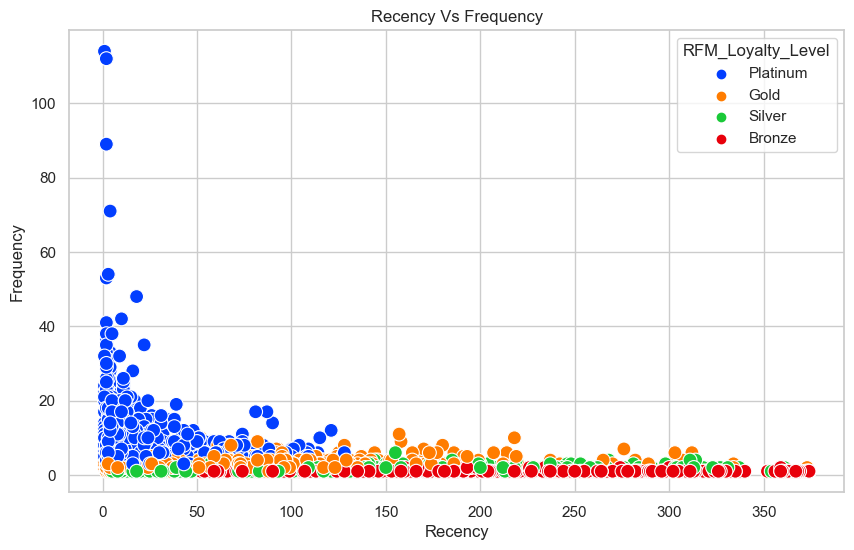

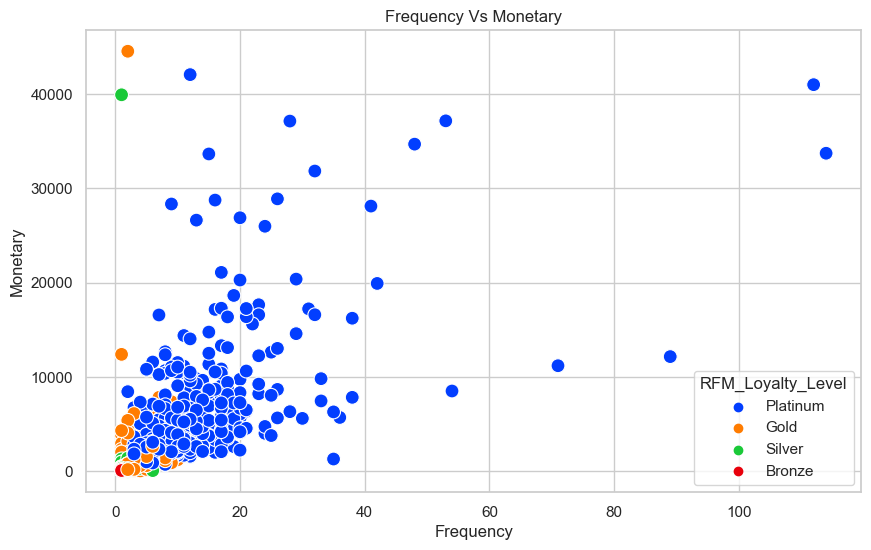

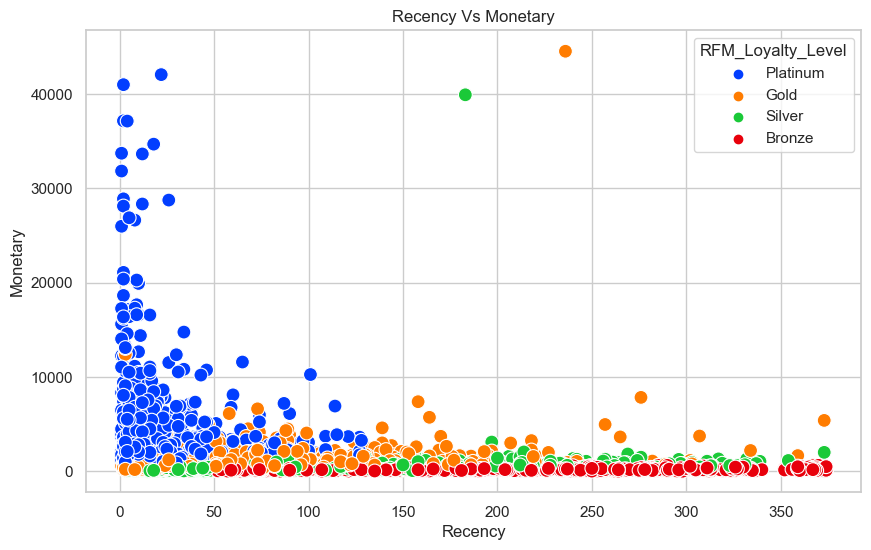

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Recency Vs Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='RFM_Loyalty_Level', data=graph, palette='bright', s=100)
plt.title('Recency Vs Frequency')

# Frequency Vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='RFM_Loyalty_Level', data=graph, palette='bright', s=100)
plt.title('Frequency Vs Monetary')

# Recency Vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='RFM_Loyalty_Level', data=graph, palette='bright', s=100)
plt.title('Recency Vs Monetary')


Text(0.5, 1.0, 'Percentage of Customers by Loyalty Level')

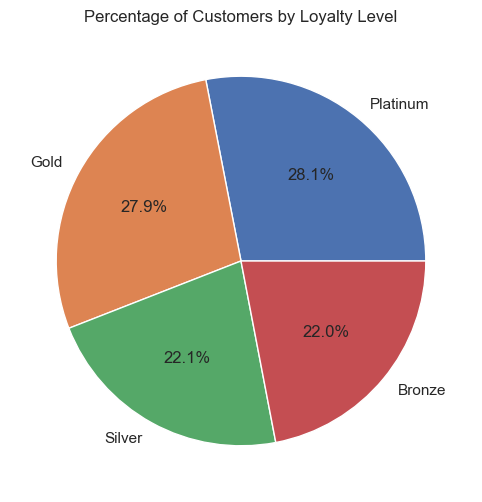

In [106]:
import matplotlib.pyplot as plt

# Calculate the count of customers in each category
category_counts = RFMScores['RFM_Loyalty_Level'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts,labels=category_counts.index,autopct='%1.1f%%')
plt.title('Percentage of Customers by Loyalty Level')


# K-Means Clustering

In [121]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13840\3405418595.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Recency_Plot)


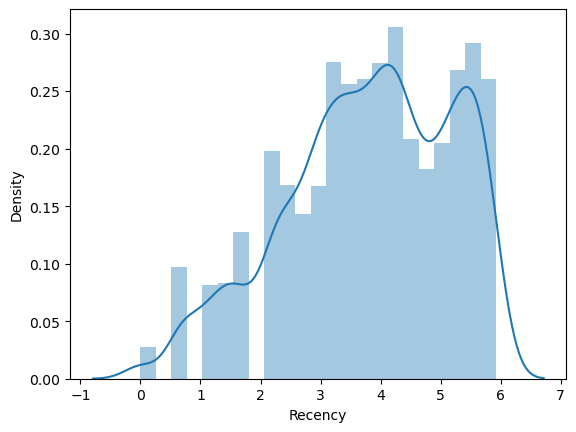

In [122]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13840\3860155807.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Frequency_Plot)


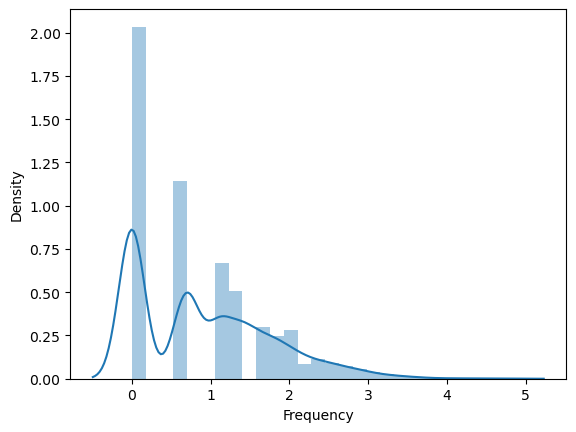

In [123]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13840\3520579960.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(Monetary_Plot)


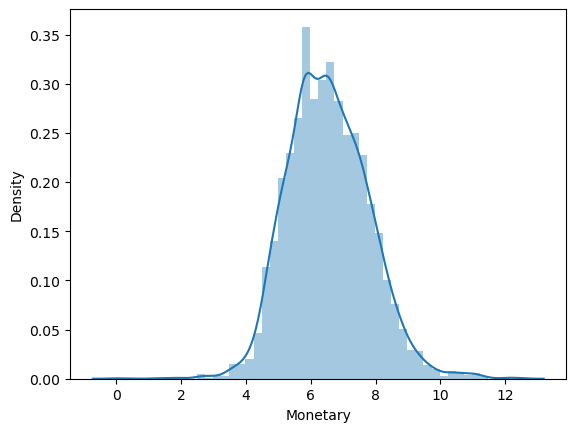

In [124]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [125]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data,columns = Log_Tfd_Data.columns)
Scaled_Data

,Recency,Frequency,Monetary
0,1.438782,-1.036504,3.766415
1,-1.953138,1.739384,1.439009
2,-2.748300,4.445816,3.104639
3,-1.745484,0.567908,1.419028
4,-1.745484,0.567908,0.244935
...,...,...,...
3916,1.323740,-1.036504,-1.075421
3917,1.012621,-1.036504,-1.718015
3918,-1.244076,-0.234298,-1.086610
3919,-1.745484,2.018362,0.883533


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

Text(0.5, 1.0, 'Elbow Method For Optimal k')

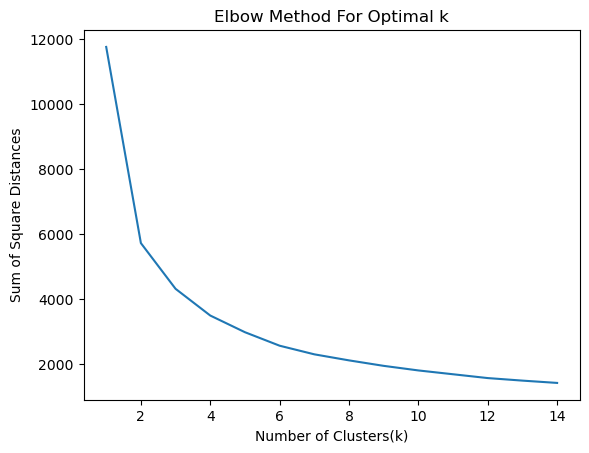

In [126]:
from sklearn.cluster import KMeans

wcss = []
#elbow method
for i in range(1,15):
    km = KMeans(n_clusters = i) # this created a KMeans model
    km.fit_predict(Scaled_Data) # this predicts which cluster each data point belongs to, means it assign each data point to one of the cluster
    wcss.append(km.inertia_)
    
#Plot the graph for the sum of square distance values and Number of Clusters
plt.plot(range(1,15),wcss)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')

In [127]:
x = Scaled_Data.iloc[:,:].values
km = KMeans(n_clusters = 4)
y_means = km.fit_predict(x) #it assign each point to a cluster and here no. of clusters are 4
RFMScores['Cluster'] = y_means
RFMScores

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,4,4,1,441,9,Silver,1
12747.0,3,11,4196.01,1,1,1,111,3,Platinum,3
12748.0,1,114,33719.73,1,1,1,111,3,Platinum,3
12749.0,4,4,4090.88,1,2,1,121,4,Platinum,3
12820.0,4,4,942.34,1,2,2,122,5,Platinum,3
...,...,...,...,...,...,...,...,...,...,...
18280.0,278,1,180.60,4,4,4,444,12,Bronze,2
18281.0,181,1,80.82,4,4,4,444,12,Bronze,2
18282.0,8,2,178.05,1,3,4,134,8,Gold,0


<Figure size 700x700 with 0 Axes>

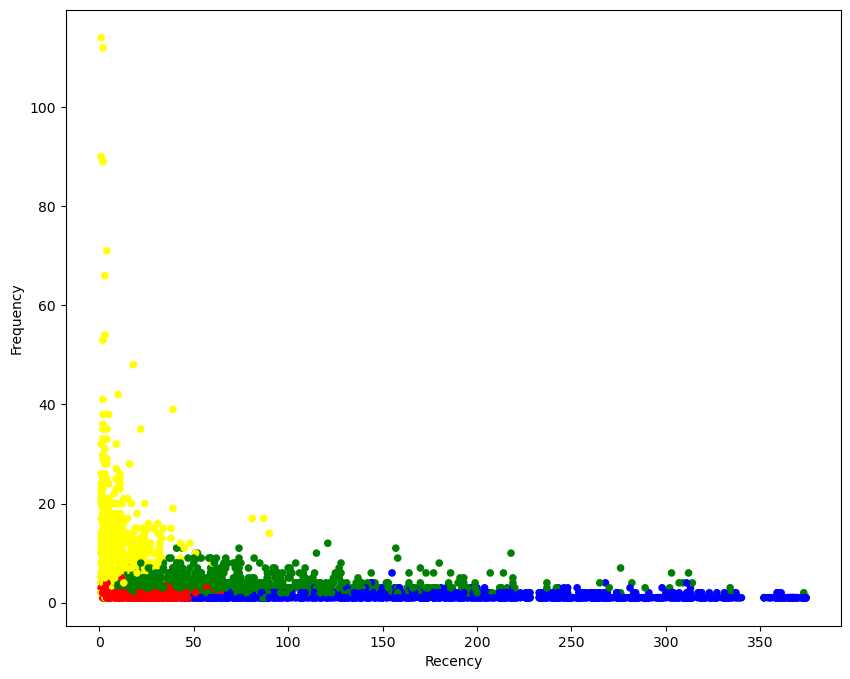

In [129]:
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
colors = ["red", "green", "blue","Yellow"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)

In [130]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,4,4,1,441,9,Silver,1,green
12747.0,3,11,4196.01,1,1,1,111,3,Platinum,3,Yellow
12748.0,1,114,33719.73,1,1,1,111,3,Platinum,3,Yellow
12749.0,4,4,4090.88,1,2,1,121,4,Platinum,3,Yellow
12820.0,4,4,942.34,1,2,2,122,5,Platinum,3,Yellow
